<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Признаки" data-toc-modified-id="Признаки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Признаки</a></span><ul class="toc-item"><li><span><a href="#Целевой-признак" data-toc-modified-id="Целевой-признак-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Целевой признак</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Для-начала-обучим-модели-без-учета-дисбаланса-классов." data-toc-modified-id="Для-начала-обучим-модели-без-учета-дисбаланса-классов.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Для начала обучим модели без учета дисбаланса классов.</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Признаки
- RowNumber — индекс строки в данных (не нужен)
- CustomerId — уникальный идентификатор клиента (не нужен)
- Surname — фамилия (не нужен)
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
#### Целевой признак
Exited — факт ухода клиента

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

In [46]:
df=pd.read_csv('D://Игорь/projects/Churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [47]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [48]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

В столбце Exited только 0 и 1, т.к. его и нужно предстазать то это задача классификации

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропуски только в столбце Tenure

In [50]:
df.columns = df.columns.str.lower()

In [51]:
# Tenure — сколько лет человек является клиентом банка
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [52]:
#Значения от 0 до 10, заменим пропуски медианой в зависимостит от возраста

df['tenure'] = df['tenure'].fillna(df.groupby('age')['tenure'].transform('median')).astype(int)
df['tenure'].value_counts()

5     1764
1      953
2      950
8      933
3      933
4      926
7      925
6      906
9      882
10     446
0      382
Name: tenure, dtype: int64

столбцы rownumber, customerid, surname не несут полезной инфы для алгоритма, моэжно удалить

In [53]:
df = df.drop(['rownumber', 'customerid', 'surname'], axis = 1)

столбцы gheography и gender имеют категориальные признаки, их необходимо перевести в численные.

In [54]:
display(df['geography'].value_counts())
display(df['gender'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

Male      5457
Female    4543
Name: gender, dtype: int64

In [55]:
# их можно приобразовать с помощью OHE.
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head(5)



,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [56]:
# выделяем признаки и целевой, делим на обучающую ,тестовую и валидационную выборки
features = df_ohe.drop('exited', axis=1)
target = df_ohe['exited']

#выделим из датасета 20 % на тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

#и выделим еще 20 % от оставшегося датасета на валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)

print('Размер обучающей выборки:', len(target_train))
print('Размер тестовой выборки:', len(target_test))
print('Размер валидационной выборки:', len(target_valid))

Размер обучающей выборки: 6000
Размер тестовой выборки: 2000
Размер валидационной выборки: 2000


In [57]:
# далее проводим масштабирование при помощт стандартизации  данных. используем метод scaler/
numeric=['creditscore', 'age', 'tenure', 'balance', 'numofproducts','estimatedsalary']
scaler = StandardScaler()
scaler.fit((features_train[numeric]))
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])

print(features_train.sample(5))


      creditscore       age    tenure   balance  numofproducts  hascrcard  \
2889    -0.598210 -0.746128  1.439311 -1.232442      -0.896909          0   
7758     0.608610  0.208244 -0.729687 -1.232442       0.816929          1   
8830    -0.928280  0.017370  0.354812  0.862666      -0.896909          1   
5268     0.402316 -1.032439 -1.452687 -1.232442       0.816929          0   
9029    -0.598210 -1.986811 -1.452687  0.896841      -0.896909          1   

      isactivemember  estimatedsalary  geography_Germany  geography_Spain  \
2889               1        -1.638704                  0                0   
7758               1         1.632371                  0                0   
8830               0        -1.566758                  1                0   
5268               0        -0.122646                  0                0   
9029               0         1.179047                  1                0   

      gender_Male  
2889            0  
7758            1  
8830          

Вывод:
1. в датасете 14 столбцов и 10 000стррок. пропуски только в сторлбце tenure/
2. так нам нужен столбцец exited  - то перед нами задача классификации
3. Пропуски в столбце tenure были заменены на медианы в зависимости от возраста
4. столбцы: rownumber(индекс строки), custumerid(id клиента), surname(фамилия) не несут полезной для анализа информации и их удалили
5. столбцы geography и gender былди преобразованы в численные
6. Было произведено масштабирование при помощи стандартизации данных
7. Были выделены обучающая, тестовая и валидационная выфборки

## Исследование задачи

### Для начала обучим модели без учета дисбаланса классов.

#### Дерево решений

In [58]:
#hp - hyper parameters
best_hp_f1 = [] 
best_f1 = 0
best_hp_auc_roc = []
best_auc_roc = 0
best_tree = None
for depth in range(1, 20):
    for min_samples_leaf in range(1, 50):
        tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=min_samples_leaf)
        tree_model.fit(features_train, target_train)
        tree_predictions = tree_model.predict(features_valid)
        f1 = f1_score(target_valid, tree_predictions)
        probabilities_valid = tree_model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_hp_f1 = [depth, min_samples_leaf]
            best_tree = tree_model
            best_auc_roc = auc_roc
            best_tree_depth = depth
            best_leaf = min_samples_leaf
            
            
print('Лучший результат f1 для дерева: {} с количеством узлов {} и минимальным количеством листьев {}'
      .format(best_f1, best_hp_f1[0], best_hp_f1[1]))
print('Лучший результат auc_roc для дерева: {} с количеством узлов {} и минимальным количеством листьев {}'
      .format(best_auc_roc, best_hp_f1[0], best_hp_f1[1]))

Лучший результат f1 для дерева: 0.5828571428571429 с количеством узлов 10 и минимальным количеством листьев 38
Лучший результат auc_roc для дерева: 0.8373940383297913 с количеством узлов 10 и минимальным количеством листьев 38


f1 = 0,58, это меньше чем 0,59. 

Параметры f1 и AUC-ROC при изменении гиперпараметров меняются синхронно: чем выше получается f1, тем выше и AUC-ROC.

Измерим площадь ROC-кривой, чтобы выявить, как сильно наша модель отличается от случайной и какова вероятность положительного класса.

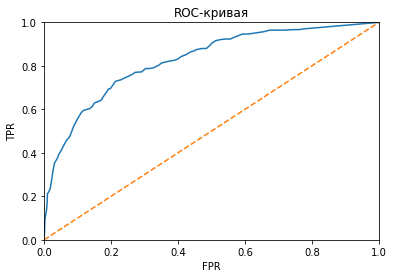

In [59]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC-кривая')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show() 

Исходя из гистограммы дерево решений работает адекватно и существенно отличается от случайцйной модели

#### Случайный лес

In [60]:
best_hp_f1 = []
best_f1 = 0
best_hp_auc_roc = []
best_auc_roc = 0
best_forest = None
for depth in range(1, 15):
    for est in range(1, 50):
        forest_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        forest_model.fit(features_train, target_train)
        forest_predictions = forest_model.predict(features_valid)
        f1 = f1_score(target_valid, forest_predictions)
        probabilities_valid = forest_model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_hp_f1 = [depth, est]
            best_forest = forest_model
            best_auc_roc = auc_roc
            best_forest_depth = depth
            best_est = est

print('Лучший результат f1 для леса: {} с глубиной {} и числом деревьев {}'
      .format(best_f1, best_hp_f1[0], best_hp_f1[1]))
print('Лучший результат auc_roc для дерева: {} с глубиной {} и числом деревьев {}'
      .format(best_auc_roc, best_hp_f1[0], best_hp_f1[1]))

Лучший результат f1 для леса: 0.5705128205128206 с глубиной 11 и числом деревьев 18
Лучший результат auc_roc для дерева: 0.8396424205913349 с глубиной 11 и числом деревьев 18


f1 = 0,57, это хуже дерева решений

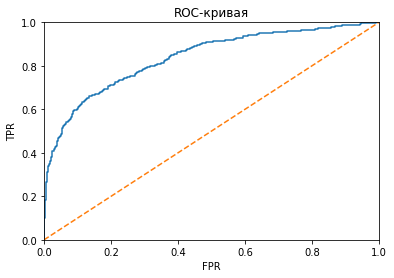

In [61]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.show() 

По ROC-кривой модель работает адекватно.

#### Логистическая регрессия

In [62]:
reg_model = LogisticRegression(random_state=12345, solver='liblinear')
reg_model.fit(features_train, target_train)
reg_predictions = reg_model.predict(features_valid)
f1 = f1_score(target_valid, reg_predictions)
probabilities_valid = reg_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('F1 логистической регрессии:', f1)
print('AUC_ROC логистической регрессии:', auc_roc)

F1 логистической регрессии: 0.30131826741996237
AUC_ROC логистической регрессии: 0.7703296196744973


f1 = 0,3, самый маленький результат

измерим ROC-кривую

In [63]:
probabilities_valid = reg_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7703296196744973


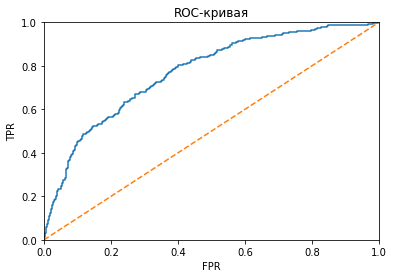

In [64]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.show() 

Вывод:
1. По дереву решений f1 = 0,58. Это самый высокий результат
2. По случайному лесу f1 = 0,55, результат хуже дерева решений
3. По логистической регрессии f1 = 0,3, это худший результат.

## Борьба с дисбалансом

In [65]:
# Изменение порога на дереве решений
best_threshold_tree = 0
best_f1_th_tree = 0
best_precision = 0
best_recall = 0
probabilities_valid = best_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1_th_tree:
        best_f1_th_tree = f1
        best_threshold_tree = threshold
        best_precision = precision
        best_recall = recall
print("Лучший порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1 = {:.2f}"
          .format(best_threshold_tree, best_precision, best_recall, best_f1_th_tree))


Лучший порог = 0.46 | Точность = 0.656, Полнота = 0.547, f1 = 0.60


f1 у дерева решений равен 0,6, превысил порог в 0,59

In [66]:
# Изменение порога на случайном лесе
best_threshold_forest = 0
best_f1_th_forest = 0
best_precision = 0
best_recall = 0
probabilities_valid = best_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1_th_forest:
        best_f1_th_forest = f1
        best_threshold_forest = threshold
        best_precision = precision
        best_recall = recall
print("Лучший порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1 = {:.2f}"
          .format(best_threshold_forest, best_precision, best_recall, best_f1_th_forest))


Лучший порог = 0.34 | Точность = 0.591, Полнота = 0.573, f1 = 0.58


При лучшем пороге в 0,34 f1 не преодалел 0,59

In [67]:
# Изменение порога на логистической регрессии
import warnings
warnings.filterwarnings('ignore')

best_threshold_reg = 0
best_f1_th_reg = 0
best_precision = 0
best_recall = 0
probabilities_valid = reg_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1_th_reg:
        best_f1_th_reg = f1
        best_threshold_reg = threshold
        best_precision = precision
        best_recall = recall
print("Лучший порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1 = {:.2f}"
          .format(best_threshold_reg, best_precision, best_recall, best_f1_th_reg))

Лучший порог = 0.32 | Точность = 0.500, Полнота = 0.488, f1 = 0.49


f1 увеличился до 0,49, но нек преодалел порог.

Далее используем технику Upsampling для увеличения выборки и для этого напишем функцию

In [68]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [69]:
target_upsampled.value_counts()

1    4876
0    4781
Name: exited, dtype: int64

In [87]:
# Проверка увеличения выборки на дереве решений
best_hp_f1_up_tree = []
best_f1_up_tree = 0
best_hp_auc_roc_up_tree = []
best_auc_roc_up_tree = 0
best_tree_up = None
for depth in range(1, 20):
    for min_samples_leaf in range(1, 50):
        tree_model_up = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=min_samples_leaf)
        tree_model_up.fit(features_upsampled, target_upsampled)
        tree_predictions_up = tree_model_up.predict(features_valid)
        f1 = f1_score(target_valid, tree_predictions_up)
        probabilities_valid = tree_model_up.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

        if f1 > best_f1_up_tree:
            best_f1_up_tree = f1
            best_hp_f1_up_tree = [depth, min_samples_leaf]
            best_tree_up = tree_model_up
            best_auc_roc_up_tree = auc_roc
           
print('Лучший результат f1 для дерева с увеличенной выборкой: {} с глубиной {} и количеством листьев {}'
      .format(best_f1_up_tree, best_hp_f1_up_tree[0], best_hp_f1_up_tree[1]))
print('Лучший результат auc_roc для дерева с увеличенной выборкой: {} с глубиной {} и количеством листьев {}'
      .format(best_auc_roc_up_tree, best_hp_f1_up_tree[0], best_hp_f1_up_tree[1]))

Лучший результат f1 для дерева с увеличенной выборкой: 0.5795918367346938 с глубиной 7 и количеством листьев 42
Лучший результат auc_roc для дерева с увеличенной выборкой: 0.8423557387394118 с глубиной 7 и количеством листьев 42


In [88]:
# Проверка увеличения выборки на случайном лесе
best_hp_f1_up_forest = []
best_f1_up_forest = 0
best_hp_auc_roc_up_forest = []
best_auc_roc_up_forest = 0
best_forest_up = None
for depth in range(1, 15):
    for est in range(1, 50):
        forest_model_up = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        forest_model_up.fit(features_upsampled, target_upsampled)
        forest_predictions_up = forest_model_up.predict(features_valid)
        f1 = f1_score(target_valid, forest_predictions_up)
        probabilities_valid = forest_model_up.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        if f1 > best_f1_up_forest:
            best_f1_up_forest = f1
            best_hp_f1_up_forest = [depth, est]
            best_forest_up = forest_model_up
            best_auc_roc_up_forest = auc_roc
            
print('Лучший результат f1 для леса на увеличенной выборке: {} с глубиной {} и количеством деревьев {}'
      .format(best_f1_up_forest, best_hp_f1_up_forest[0], best_hp_f1_up_forest[1]))
print('Лучший результат auc_roc для дерева на увеличенной выборке: {} с глубиной {} и количеством деревьев {}'
      .format(best_auc_roc_up_forest, best_hp_f1_up_forest[0], best_hp_f1_up_forest[1]))

Лучший результат f1 для леса на увеличенной выборке: 0.5997521685254027 с глубиной 13 и количеством деревьев 41
Лучший результат auc_roc для дерева на увеличенной выборке: 0.8447368462882222 с глубиной 13 и количеством деревьев 41


In [72]:
# Проверка увеличения выборки на логистической регрессии
reg_model_up = LogisticRegression(random_state=12345, solver='liblinear')
reg_model_up.fit(features_upsampled, target_upsampled)
reg_up_predictions = reg_model_up.predict(features_valid)
f1_reg_up = f1_score(target_valid, reg_up_predictions)
probabilities_valid = reg_model_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_reg_up = roc_auc_score(target_valid, probabilities_one_valid)

print('F1 логистической регрессии на увеличенной выборке:', f1_reg_up)
print('AUC_ROC логистической регрессии на увеличенной выборке:', auc_roc_reg_up)

F1 логистической регрессии на увеличенной выборке: 0.4771126760563381
AUC_ROC логистической регрессии на увеличенной выборке: 0.7725597224054591


Блдагодаря увеличению выборки порог в 0,59 превысил только случайный лес

Далее используем технику Downsampling для увеличения выборки и для этого напишем функцию

In [73]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [74]:
target_downsampled.value_counts()

1    1219
0    1195
Name: exited, dtype: int64

In [75]:
# Проверка уменьшения выборки на дереве решений
best_hp_f1_down_tree = []
best_f1_down_tree = 0
best_hp_auc_roc_down_tree = []
best_auc_roc_down_tree = 0
best_tree_down = None
for depth in range(1, 20):
    for min_samples_leaf in range(1, 50):
        tree_model_down = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=min_samples_leaf)
        tree_model_down.fit(features_downsampled, target_downsampled)
        tree_predictions_down = tree_model_down.predict(features_valid)
        f1 = f1_score(target_valid, tree_predictions_down)
        probabilities_valid = tree_model_down.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        if f1 > best_f1_down_tree:
            best_f1_down_tree = f1
            best_hp_f1_down_tree = [depth, min_samples_leaf]
            best_tree_down = tree_model_down
            best_auc_roc_down_tree = auc_roc
            
print('Лучший результат f1 для дерева с уменьшенной выборкой: {} с глубиной {} и количеством листьев {}'
      .format(best_f1_down_tree, best_hp_f1_down_tree[0], best_hp_f1_down_tree[1]))
print('Лучший результат auc_roc для дерева с уменьшенной выборкой: {} с глубиной {} и количеством листьев {}'
      .format(best_auc_roc_down_tree, best_hp_f1_down_tree[0], best_hp_f1_down_tree[1]))

Лучший результат f1 для дерева с уменьшенной выборкой: 0.5533522190745986 с глубиной 6 и количеством листьев 14
Лучший результат auc_roc для дерева с уменьшенной выборкой: 0.8145350879563326 с глубиной 6 и количеством листьев 14


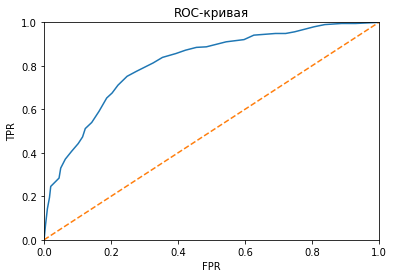

In [76]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.show() 

In [77]:
# Проверка уменьшения выборки на случайном лесе
best_hp_f1_down_forest = []
best_f1_down_forest = 0
best_hp_auc_roc_down_forest = []
best_auc_roc_down_forest = 0
best_forest_down = None
for depth in range(1, 15):
    for est in range(1, 50):
        forest_model_down = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        forest_model_down.fit(features_downsampled, target_downsampled)
        forest_predictions_down = forest_model_down.predict(features_valid)
        f1 = f1_score(target_valid, forest_predictions_down)
        probabilities_valid = forest_model_down.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        if f1 > best_f1_down_forest:
            best_f1_down_forest = f1
            best_hp_f1_down_forest = [depth, est]
            best_forest_down = forest_model_down
            best_auc_roc_down_forest = auc_roc
            
print('Лучший результат f1 для леса на уменьшенной выборке: {} с глубиной {} и количеством деревьев {}'
      .format(best_f1_down_forest, best_hp_f1_down_forest[0], best_hp_f1_down_forest[1]))
print('Лучший результат auc_roc для дерева на уменьшенной выборке: {} с глубиной {} и количеством деревьев {}'
      .format(best_auc_roc_down_forest, best_hp_f1_down_forest[0], best_hp_f1_down_forest[1]))

Лучший результат f1 для леса на уменьшенной выборке: 0.5694980694980695 с глубиной 9 и количеством деревьев 9
Лучший результат auc_roc для дерева на уменьшенной выборке: 0.8355032990578889 с глубиной 9 и количеством деревьев 9


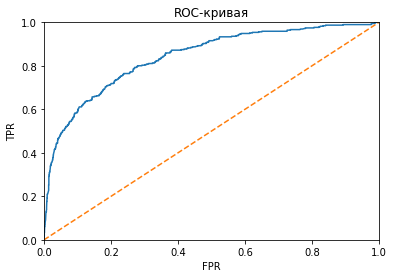

In [78]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.show() 

In [79]:
# Проверка уменьшения выборки на логистической регрессии
reg_model_down = LogisticRegression(random_state=12345, solver='liblinear')
reg_model_down.fit(features_downsampled, target_downsampled)
reg_down_predictions = reg_model_down.predict(features_valid)
f1_reg_down = f1_score(target_valid, reg_down_predictions)
probabilities_valid = reg_model_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_reg_down = roc_auc_score(target_valid, probabilities_one_valid)

print('F1 логистической регрессии на уменьшенной выборке:', f1_reg_down)
print('AUC_ROC логистической регрессии на уменьшенной выборке:', auc_roc_reg_down)

F1 логистической регрессии на уменьшенной выборке: 0.47493403693931396
AUC_ROC логистической регрессии на уменьшенной выборке: 0.7737709399970436


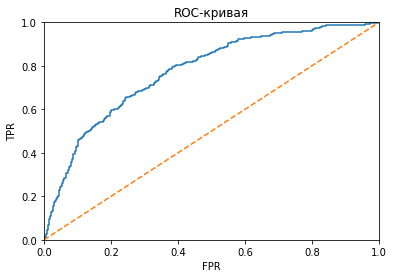

In [80]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.show() 

При уменьшении выборки качество дерева решений и случайного леса ухудшились, логистическая регрессия практически не изменилась

Вывод:
1. Для борьбы с дисбалансом были использованы: изменение порога, увеличение и уменьшение выборки
2. изменение порога увеличило f1  у дерева решений с 0,46 до 0,6 и позволило преодолеть порог в 0,59
3. увеличение выборки увеличило f1 у случайного леса с 0,57 до 0,59 и позволило преодолеть порог в 0,59

## Тестирование модели

Для тестовой выборки используем модели, колторые показали лучший результат при увеличении выборки

In [81]:
# дерево решений
final_tree = best_tree_up                                
final_tree_predictions = final_tree.predict(features_test)
probabilities_test = final_tree.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('f1 финального дерева решений составляет:', f1_score(target_test, final_tree_predictions))
print('AUC-ROC финального дерева решений составляет:', auc_roc)

f1 финального дерева решений составляет: 0.6058879392212726
AUC-ROC финального дерева решений составляет: 0.8462260541247129


f1  увеличилось до 0,60 и преодалело порог в 0,59

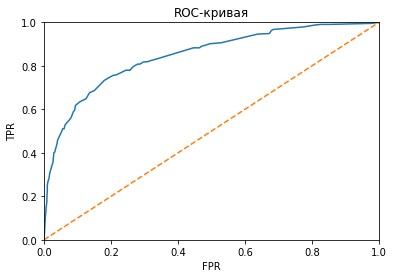

In [82]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.show() 

In [83]:
# случайный лес
final_forest = best_forest_up
                                                                                                              
final_forest_predictions = final_forest.predict(features_test)
probabilities_test = final_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('f1 финального случайного леса составляет:', f1_score(target_test, final_forest_predictions))
print('AUC-ROC финального случайного леса составляет:', auc_roc)

f1 финального случайного леса составляет: 0.6263345195729537
AUC-ROC финального случайного леса составляет: 0.8543394012842598


f1 увеличилось до 0,62 и преодалело предел в 0,59

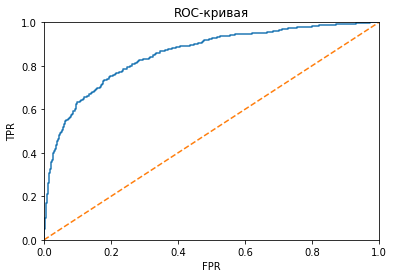

In [84]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.show() 

In [85]:
# логистическая регрессия
final_regression = reg_model_up

final_regression_predictions = final_regression.predict(features_test)
probabilities_test = final_regression.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('F1 финальной логистической регрессии:', f1_score(target_test, final_regression_predictions))
print('AUC-ROC финальной логистической регрессии:', auc_roc)

F1 финальной логистической регрессии: 0.504983388704319
AUC-ROC финальной логистической регрессии: 0.7638248487726879


f1 у логистической регрессии 0,50 и так и не смогла преодалеть порог в 0,59

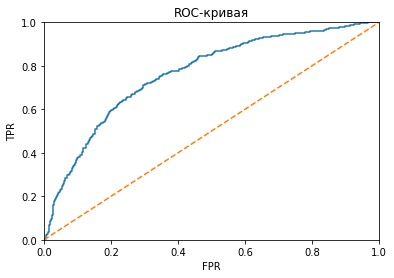

In [86]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.show() 

Вывод:
1. f1 у дерева решений 0,60
2. f1 у случайного леса 0,62 и это лучший результат
3. логистическая регрессия так и не смогла преодолеть порог в 0,59

## Общий вывод
1. в датасете 14 столбцов и 10 000стррок. пропуски только в сторлбце tenure/
2. так нам нужен столбцец exited  - то перед нами задача классификации
3. Пропуски в столбце tenure были заменены на медианы в зависимости от возраста
4. столбцы: rownumber(индекс строки), custumerid(id клиента), surname(фамилия) не несут полезной для анализа информации и их удалили
5. столбцы geography и gender былди преобразованы в численные
6. Было произведено масштабирование при помощи стандартизации данных
7. Были выделены обучающая, тестовая и валидационная выборки
8. Для борьбы с дисбалансом были использованы: изменение порога, увеличение и уменьшение выборки
9. изменение порога увеличило f1  у дерева решений с 0,46 до 0,6 и позволило преодолеть порог в 0,59
10. увеличение выборки увеличило f1 у случайного леса с 0,57 до 0,59 и позволило преодолеть порог в 0,59
11. При проверке на естовой выборке:
- 1. f1 у дерева решений 0,60
- 2. f1 у случайного леса 0,62 и это лучший результат
- 3. логистическая регрессия так и не смогла преодолеть порог в 0,59

